## Задание 1/2

In [1]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [2]:
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna(axis=1)

In [5]:
df = data[['TransactionAmt','isFraud', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']]

In [6]:
x_train, x_valid = train_test_split(
    df.drop(["isFraud"], axis=1), train_size=0.7, shuffle=True, random_state=1,
)
y_train, y_valid = train_test_split(
    df["isFraud"], train_size=0.7, shuffle=True, random_state=1,
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 70000 rows, 17 cols
x_valid.shape = 30000 rows, 17 cols


In [7]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 1.0, Valid-score: 0.7844


In [10]:
#Задание 3

In [11]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=27),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8],
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

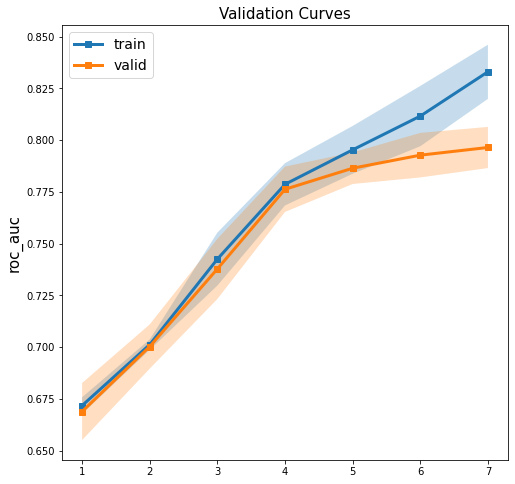

In [12]:
plot_validation_curves(
    train_scores, valid_scores
)